In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *

In [3]:
path=pathlib.Path('/media/tris/tris_files/era-for-bw')
path

PosixPath('/media/tris/tris_files/era-for-bw')

In [4]:
df = pd.read_csv(path/'labels_proc.csv')
df.tail()

,file_name,valence,arousal,dominance,liking
1275,s32_t36,3.91,6.96,5.82,3.12
1276,s32_t37,2.81,6.13,6.06,1.04
1277,s32_t38,3.05,7.01,5.10,1.10
1278,s32_t39,3.99,7.17,4.85,1.00
1279,s32_t40,7.15,4.03,9.00,1.88


In [5]:
# np.random.seed(60)
# src = (ImageList.from_csv(path, 'labels_proc.csv', folder='GAF-cmap', suffix='.png')
#        .split_by_rand_pct(0.2)
#        .label_from_df(cols=['valence','arousal','dominance','liking'],label_cls=FloatList)
#        .transform()
#        .databunch(bs=10).normalize(imagenet_stats))

In [6]:
np.random.seed(60)
src = (ImageList.from_csv(path, 'labels_proc.csv', folder='GAF-cmap', suffix='.png')
       .split_by_rand_pct(0.2)
       .label_from_df(cols=['valence','arousal','dominance','liking'],label_cls=FloatList)
       .transform(size=256)
       .databunch(bs=2))

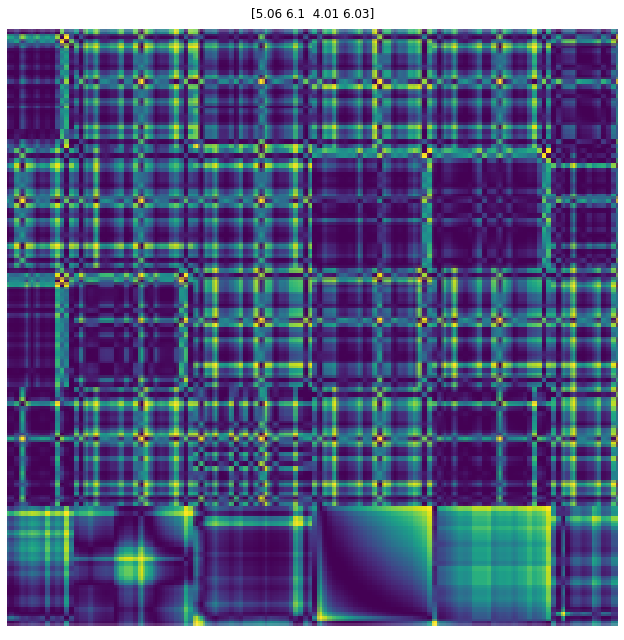

In [7]:
src.show_batch(rows=1, figsize=(12,9))

In [8]:
learn = cnn_learner(src, models.resnet18, metrics=[root_mean_squared_error])
#learn = unet_learner(src, models.resnet18, metrics=[root_mean_squared_error])

In [9]:
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,root_mean_squared_error,time


/media/tris/tris_files/anaconda3/envs/fastai/lib/python3.7/site-packages/torch/nn/modules/loss.py:431: UserWarning: Using a target size (torch.Size([8])) that is different to the input size (torch.Size([524288])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


RuntimeError: The size of tensor a (524288) must match the size of tensor b (8) at non-singleton dimension 0

In [27]:
lr = 3.5e-3

In [28]:
learn.fit_one_cycle(5, slice(lr), wd=0.2)

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,30.063959,19.068556,4.341551,00:37
1,12.204096,6.657298,2.555204,00:37
2,6.847780,5.671175,2.358876,00:37
3,5.565916,5.261375,2.273550,00:37
4,4.598003,5.219378,2.268508,00:38


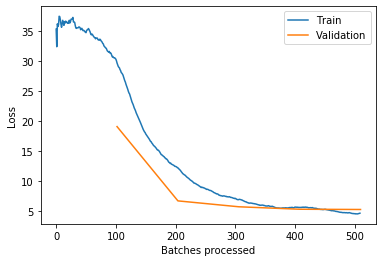

In [30]:
learn.recorder.plot_losses()

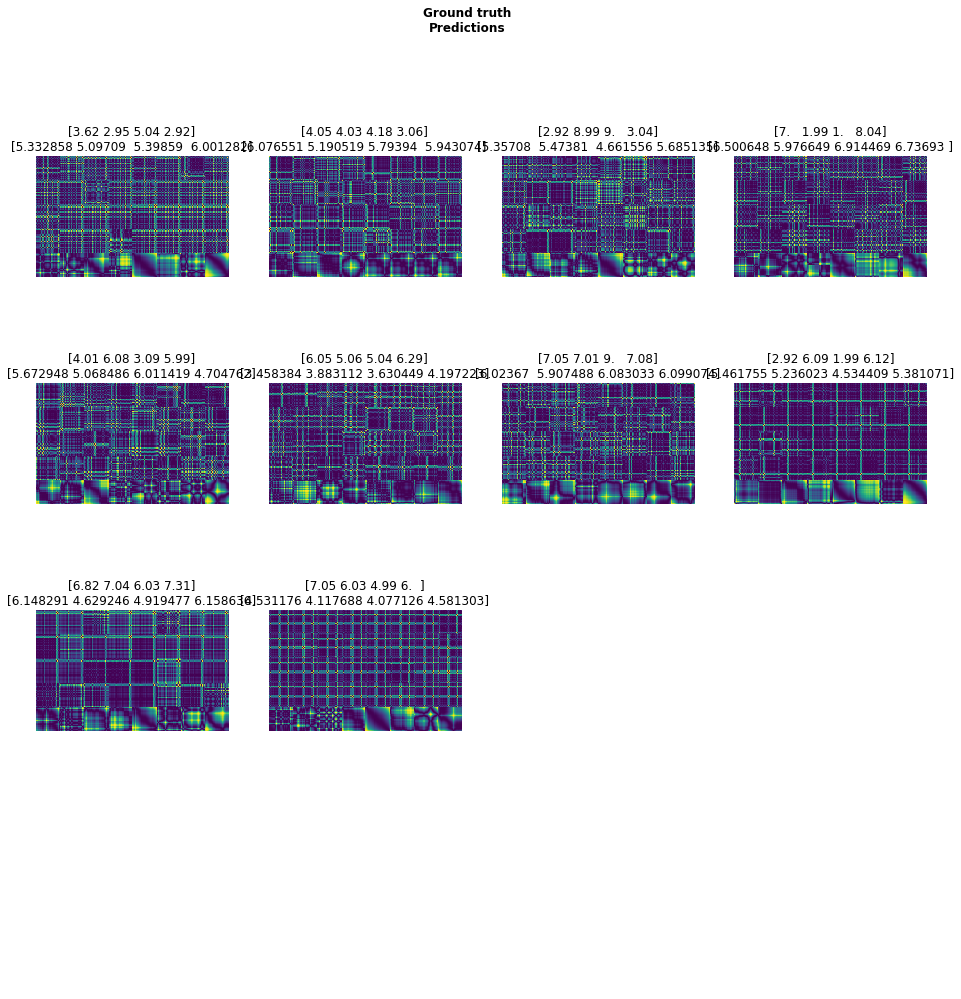

In [31]:
learn.show_results()